In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [36]:
def potential_gradient(x, y, g, k):

    """ Velocity Verlet implementation on a rope
    This function computes the gradient for each particle r(x,y)

    Parameters:
        x, y = coordinates of particles
        g = 9.8 is gravity constant
        k = 50 is spring constant
        size = length of markov chain
        mass = mass of particle
    """
    particles = len(x)
    gradient_x, gradient_y = np.zeros(particles), np.zeros(particles)
    gravity_g = np.zeros(particles)
    gradient_x[1:-1] = 2*k*(2*x[1:-1] - x[:-2] - x[2:])
    gradient_y[1:-1] = 2*k*(2*y[1:-1] - y[:-2] - y[2:])
    gravity_g[1:-1] = g
    return gradient_x, gradient_y + gravity_g


In [37]:
def vv(potential_gradient, rx, ry, tow=0.01, g=9.8, k=20,
        size=10000, mass=1.0):

    n = len(rx)
    verletX, verletY = np.zeros((size, n)), np.zeros((size, n))
    velocity_x, velocity_y = np.zeros((size, n)), np.zeros((size, n))
    verletX[0], verletY[0] = rx, ry
    for i in range(1, size):
        grad_x, grad_y = potential_gradient(verletX[i-1], verletY[i-1], g, k)
        rx_new = verletX[i-1] + tow*velocity_x[i-1] - ((tow**2)/(mass*2))*grad_x
        ry_new = verletY[i-1] + tow*velocity_y[i-1] - ((tow**2)/(mass*2))*grad_y
        verletX[i], verletY[i] = rx_new, ry_new
        new_grad_x, new_grad_y = potential_gradient(rx_new, ry_new, g, k)
        vx_new = velocity_x[i-1] - (tow/(2*mass)) * (grad_x + new_grad_x)
        vy_new = velocity_y[i-1] - (tow/(2*mass)) * (grad_y + new_grad_y)
        velocity_x[i], velocity_y[i] = vx_new, vy_new
    return verletX, verletY


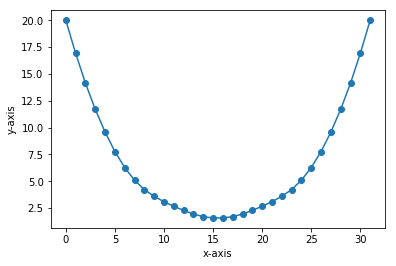

In [38]:
x_init, y_init, n = 0, 20, 32
rx, ry = np.linspace(x_init, n - 1, n), np.linspace(y_init, y_init, n)
verletX, verletY = vv(potential_gradient, rx, ry)

plt.plot(verletX[-1].T, verletY[-1].T, '-o')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()
